In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./Downloads/aac_intakes_outcomes.csv')

Data Source: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes
<br>
The data I have loaded in comes from the Austin Animal Center, a no-kill animal shelter in Austin, Texas. They have provided the intake and outcome information of animals they have taken in from 2013 to 2018.
<br>
Let's explore what values are available in this dataset.

In [3]:
print(data.columns)
print('')
print('')
print(data.dtypes)
print('')
print(type(data))

Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
       'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'age_upon_outcome_(days)', 'age_upon_outcome_(years)',
       'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month',
       'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear',
       'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color',
       'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake',
       'count', 'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number', 'time_in_shelter', 'time_in_shelter_days'],
      dtype='object')


age_upon_outcome               object
animal_id_outcome              object
date_of_birth                  object
outcome_subt

In [4]:
data.head(5)

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


From just looking at the first 5 rows, I can see that there are numerous null values. Let's find out where the null values exist within the dataset.

In [5]:
print(data.isnull().any())
print(data.shape)

age_upon_outcome              False
animal_id_outcome             False
date_of_birth                 False
outcome_subtype                True
outcome_type                   True
sex_upon_outcome               True
age_upon_outcome_(days)       False
age_upon_outcome_(years)      False
age_upon_outcome_age_group    False
outcome_datetime              False
outcome_month                 False
outcome_year                  False
outcome_monthyear             False
outcome_weekday               False
outcome_hour                  False
outcome_number                False
dob_year                      False
dob_month                     False
dob_monthyear                 False
age_upon_intake               False
animal_id_intake              False
animal_type                   False
breed                         False
color                         False
found_location                False
intake_condition              False
intake_type                   False
sex_upon_intake             

Fortunately, most of the columns do not have null values. The columns that <i>do</i> contain null values are outcome_subtype, outcome_type, sex_upon_outcome, and sex_upon_intake. Outcome subtype is not relevent to every outcome situation, which explains why it has null values. On Kaggle, this column is described as, <i>"More specific outcome type corresponding to the outcome type <u>where appropriate.</u>"</i>

Next, to clean up the data a bit, I am going to delete the columns I don't need for my analyses in order to make the Dataframe easier to read.

In [6]:
dropcols = ['age_upon_outcome', 'animal_id_outcome', 'date_of_birth', 'outcome_weekday', 'outcome_hour', 
            'outcome_number', 'dob_month', 'dob_monthyear', 'animal_id_intake', 'intake_datetime',
            'intake_weekday', 'intake_hour', 'intake_number', 'age_upon_outcome_(days)', 'age_upon_intake_(days)', 'dob_year' 
           ]
data.drop(dropcols, inplace=True, axis=1)

In [7]:
data.head(1)

,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,age_upon_intake,...,intake_type,sex_upon_intake,count,age_upon_intake_(years),age_upon_intake_age_group,intake_month,intake_year,intake_monthyear,time_in_shelter,time_in_shelter_days
0,NaN,Return to Owner,Neutered Male,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,12,2017,2017-12,10 years,...,Stray,Neutered Male,1,10.0,"(7.5, 10.0]",12,2017,2017-12,0 days 14:07:00.000000000,0.588194


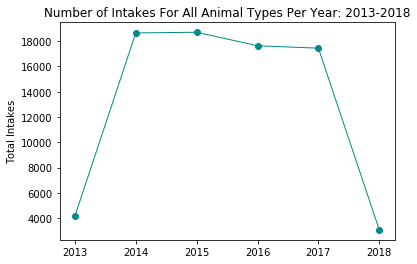

In [208]:
intakenum = data.groupby(["intake_year"]).size().reset_index(name="intakes")

plt.plot('intake_year', 'intakes', data=intakenum, linestyle='-', marker='o', color='darkcyan', linewidth=1)
plt.title("Number of Intakes For All Animal Types Per Year: 2013-2018")
plt.ylabel('Total Intakes')

plt.show()

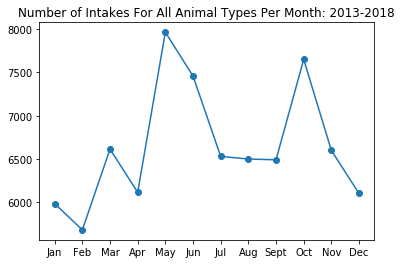

In [209]:
month_counts = data.groupby('intake_month').intake_month.count()
#xlabels = ['Jan', 'Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

plt.plot(month_counts, marker='o')
plt.xticks(range(1, 13, 1), labels=['Jan', 'Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.title('Number of Intakes For All Animal Types Per Month: 2013-2018')

plt.show()

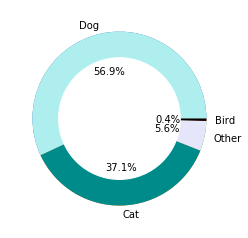

In [272]:
#Percentages of each type of animal in shelter
types = data['animal_type'].value_counts(normalize=True) * 100
names='Dog', 'Cat', 'Other', 'Bird'

#Create the donut plot
plt.pie(types, labels=names, autopct='%1.1f%%', pctdistance=0.56, labeldistance=1.1)
circle=plt.Circle((0,0), 0.7, color='white')

#Specify the text label color
plt.rcParams['text.color'] = 'black'

#Customize the colors of each slice in the plot
plt.pie(types, colors = ("paleturquoise", "darkcyan", "lavender", "black"))
p=plt.gcf()
p.gca().add_artist(circle)

plt.show()

Dogs are most commonly found animal in the shelter, followed by cats and then 'Other', which I will explore next. Birds are hardly ever found in the shelter, which I predict is because the shelter is not equipped to take care of them as well as other facilities, and/or not many pet or wild birds are found estranged or injured.

In [273]:
# Types of animals in the 'Other' category
print(data[data['animal_type']=='Other']['breed'].unique())

#Group animals into broader categories for efficient plotting
data.loc[data['breed'].str.contains('Bat', case=False), 'breed'] = 'Bat'
data.loc[data['breed'].str.contains('californian', case=False), 'breed'] = 'Rabbit'
data.loc[data['breed'].str.contains('Rabbit', case=False), 'breed'] = 'Rabbit'
data.loc[data['breed'].str.contains('raccoon', case=False), 'breed'] = 'Raccoon'
data.loc[data['breed'].str.contains('opossum', case=False), 'breed'] = 'Opossum'
data.loc[data['breed'].str.contains('Skunk', case=False), 'breed'] = 'Skunk'
data.loc[data['breed'].str.contains('fox', case=False), 'breed'] = 'Fox'
data.loc[data['breed'].str.contains('armadillo', case=False), 'breed'] = 'Armadillo'
data.loc[data['breed'].str.contains('squirrel', case=False), 'breed'] = 'Squirrel'
data.loc[data['breed'].str.contains('Rat', case=False), 'breed'] = 'Rodent'
data.loc[data['breed'].str.contains('coyote', case=False), 'breed'] = 'Coyote'
data.loc[data['breed'].str.contains('Hamster', case=False), 'breed'] = 'Rodent'
data.loc[data['breed'].str.contains('Rabbit', case=False), 'breed'] = 'Rabbit'
data.loc[data['breed'].str.contains('english Spot', case=False), 'breed'] = 'Rabbit'
data.loc[data['breed'].str.contains('Rabbit', case=False), 'breed'] = 'Rabbit'
data.loc[data['breed'].str.contains('lionhead', case=False), 'breed'] = 'Rabbit'
data.loc[data['breed'].str.contains('ferret', case=False), 'breed'] = 'Ferret'
data.loc[data['breed'].str.contains('Guinea Pig', case=False), 'breed'] = 'Rodent'
data.loc[data['breed'].str.contains('Turtle', case=False), 'breed'] = 'Reptile'
data.loc[data['breed'].str.contains('rex', case=False), 'breed'] = 'Rabbit'
data.loc[data['breed'].str.contains('silver', case=False), 'breed'] = 'Rabbit'
data.loc[data['breed'].str.contains('tortoise', case=False), 'breed'] = 'Reptile'
data.loc[data['breed'].str.contains('sugar', case=False), 'breed'] = 'Opossum'
data.loc[data['breed'].str.contains('Dutch', case=False), 'breed'] = 'Rabbit'
data.loc[data['breed'].str.contains('jersey', case=False), 'breed'] = 'Rabbit'
data.loc[data['breed'].str.contains('Cotton', case=False), 'breed'] = 'Rabbit'
data.loc[data['breed'].str.contains('Lop', case=False), 'breed'] = 'Rabbit'
data.loc[data['breed'].str.contains('Cold', case=False), 'breed'] = 'Reptile'
data.loc[data['breed'].str.contains('american', case=False), 'breed'] = 'Rabbit'
data.loc[data['breed'].str.contains('snake', case=False), 'breed'] = 'Reptile'
data.loc[data['breed'].str.contains('Lizard', case=False), 'breed'] = 'Reptile'
data.loc[data['breed'].str.contains('New zeal', case=False), 'breed'] = 'Rabbit'
data.loc[data['breed'].str.contains('Squirrel', case=False), 'breed'] = 'Rodent'
data.loc[data['breed'].str.contains('Mouse', case=False), 'breed'] = 'Rodent'
data.loc[data['breed'].str.contains('Hotot', case=False), 'breed'] = 'Rabbit'
data.loc[data['breed'].str.contains('Cinna', case=False), 'breed'] = 'Rabbit'
data.loc[data['breed'].str.contains('gerbil', case=False), 'breed'] = 'Rodent'
data.loc[data['breed'].str.contains('Angor', case=False), 'breed'] = 'Rabbit'
data.loc[data['breed'].str.contains('Ringtail', case=False), 'breed'] = 'Raccoon'
data.loc[data['breed'].str.contains('netherlnd', case=False), 'breed'] = 'Rabbit'
data.loc[data['breed'].str.contains('Mouse', case=False), 'breed'] = 'Rodent'
data.loc[data['breed'].str.contains('bobcat', case=False), 'breed'] = 'Bobcat'
data.loc[data['breed'].str.contains('Check', case=False), 'breed'] = 'Rabbit'
data.loc[data['breed'].str.contains('Havana', case=False), 'breed'] = 'Rabbit'
data.loc[data['breed'].str.contains('Chinchilla', case=False), 'breed'] = 'Rodent'
data.loc[data['breed'].str.contains('Polish', case=False), 'breed'] = 'Rabbit'
data.loc[data['breed'].str.contains('otter', case=False), 'breed'] = 'Otter'
data.loc[data['breed'].str.contains('Harl', case=False), 'breed'] = 'Rabbit'
data.loc[data['breed'].str.contains('Flemish', case=False), 'breed'] = 'Rabbit'
data.loc[data['breed'].str.contains('tropical', case=False), 'breed'] = 'Tropical'
data.loc[data['breed'].str.contains('Deer', case=False), 'breed'] = 'Deer'
data.loc[data['breed'].str.contains('Belg', case=False), 'breed'] = 'Rabbit'
data.loc[data['breed'].str.contains('britan', case=False), 'breed'] = 'Rabbit'
data.loc[data['breed'].str.contains('himal', case=False), 'breed'] = 'Rabbit'

['Rabbit' 'Bat' 'Raccoon' 'Skunk' 'Opossum' 'Ferret' 'Fox' 'Armadillo'
 'Rodent' 'Reptile' 'Coyote' 'Tarantula' 'Frog' 'Bobcat' 'Hedgehog'
 'Otter' 'Tropical' 'Deer']


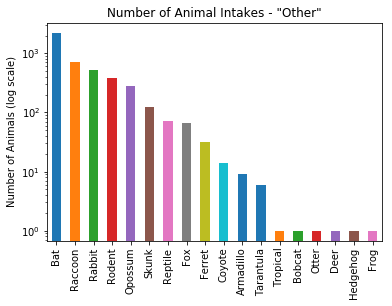

Bat          2208
Raccoon       707
Rabbit        518
Rodent        381
Opossum       284
Skunk         124
Reptile        73
Fox            66
Ferret         32
Coyote         14
Armadillo       9
Tarantula       6
Tropical        1
Bobcat          1
Otter           1
Deer            1
Hedgehog        1
Frog            1
Name: breed, dtype: int64
count     4428
unique      18
top        Bat
freq      2208
Name: breed, dtype: object


In [239]:
other = data.loc[data.animal_type == 'Other', 'breed']

other.value_counts().plot(kind='bar', logy = True)

plt.title('Number of Animal Intakes - "Other"')
plt.ylabel('Number of Animals (log scale)')

plt.show()
print(other.value_counts())
print(other.describe())

Of the "Other" type animals, the one that comes across rather vague is the Tropical category. I searched the Kaggle dataset page for answers, but it seems this information has not been released. I believe this may refer to fish, birds or reptiles, as I could not find evidence of a breed of animal with this name.

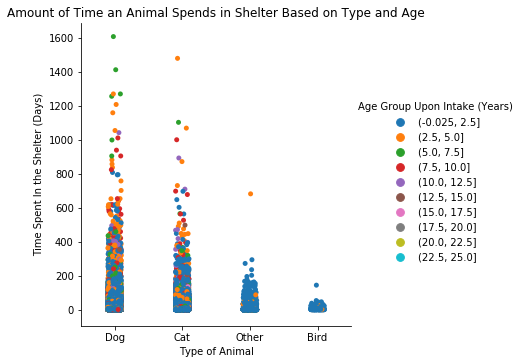

In [207]:
#Rename Age Column to Appear Neater in Legend Title
data = data.rename(columns={'age_upon_intake_age_group': 'Age Group Upon Intake (Years)'})

#Create categorical scatter plot of data
import seaborn as sns
ax = sns.catplot(x="animal_type", y="time_in_shelter_days", hue_order = ['(-0.025, 2.5]','(2.5, 5.0]','(5.0, 7.5]', '(7.5, 10.0]', '(10.0, 12.5]', 
                             '(12.5, 15.0]', '(15.0, 17.5]', '(17.5, 20.0]', '(20.0, 22.5]', '(22.5, 25.0]'                                                             
                            ], hue="Age Group Upon Intake (Years)", data=data);


plt.title("Amount of Time an Animal Spends in Shelter Based on Type and Age")
plt.xlabel('Type of Animal')
plt.ylabel('Time Spent In the Shelter (Days)')

plt.show()

As an animal gets older, the amount of time it spends in the shelter seems to increase. This is likely because they are considered 'less adoptable' by the general public. For dogs and cats, you can see that there are no animals aged between -0.025 and 2.5 years that spend more than 800 days in the shelter. All of the animals that do are between 2.5-12.5 years old. I think it is unfortunate that older animals are viewed this way because they do deserve to live out their last years in a loving home.
<br>
Keep in mind that some animals were transferred to another shelter. They may not have spent much time at the Austin Animal Shelter, but could have spent a lot of time somewhere else. Therefore, I think this graph should only be used to analyze general trends and not taken too literally.

In [250]:
print('Mean Time in Shelter for All Animals: (Days) ', data['time_in_shelter_days'].mean())
print('')
print('Mean Time in Shelter Per Animal Type: (Days)')
print(data.groupby('animal_type', as_index=False)['time_in_shelter_days'].mean())

Mean Time in Shelter for All Animals: (Days)  16.75711554526339

Mean Time in Shelter Per Animal Type: (Days)
  animal_type  time_in_shelter_days
0        Bird              8.004333
1         Cat             20.087695
2         Dog             15.897242
3       Other              4.018686


I am happy to see that most animals that come to the Austin Animal Shelter are not in the shelter for long. Dogs on average spend the longest amount of time in the shelter, closely followed by cats.  

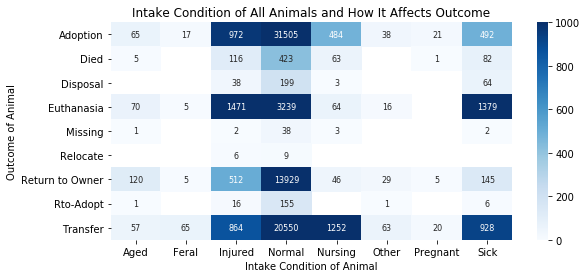

In [74]:
#Group and Pivot Data for Heatmap
grouped = data.groupby(['intake_condition','outcome_type'])[['count']].sum()
grouped = grouped.reset_index(level=[0,1]).pivot(index='outcome_type', columns='intake_condition', values='count')

plt.figure(figsize=(9, 4))
sns.heatmap(grouped, cmap='Blues', annot=True, fmt='g', annot_kws={'size': 8}, vmin=1, vmax=1000, robust=True)
plt.title("Intake Condition of All Animals and How It Affects Outcome")
plt.ylabel('Outcome of Animal')
plt.xlabel('Intake Condition of Animal')

plt.show()

Disposal, Rto-Adopt, and Missing are three vague outcomes that I was able to find clarification on via the uploader of the dataset.
<br>
<br>
<b>Disposal</b> most likely to refers to the animal dying and being disposed of. Because this is separate from the 'Died' and 'Euthanasia' outcomes, I believe this may refer to animals that are found dead.
<br>
<b>Rto-Adopt</b> likely means the animal was returned to its owner through the adoption process of the shelter.
<br>
Finally, <b>Missing</b> is an outcome in which the animal goes missing while in possession of the shelter.
<br>
<br>
Feral animals are animals that are usually found as strays and have not been domesticated. They may act skittish or aggressive towards humans and can usually not be kept as pets.
<br>
<br>
From the data, I can see that the most common situations the Austin Animal Shelter encounters is an animal in normal condition getting adopted, transferred to another facility, or returned to its owner.
<br> Of the animals that are injured or sick upon intake, most of them do get euthanized.
<br> Overall, most intakes are either adopted or transferred, which are positive outcomes.

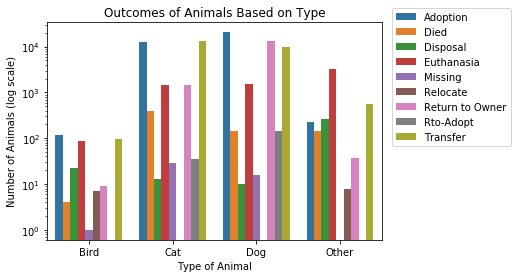

In [14]:
outcomestype = data.groupby(["outcome_type", "animal_type"]).size().reset_index(name="count2")

outcomes_type2 = sns.barplot(x='animal_type', y='count2', hue='outcome_type', data=outcomestype)

outcomes_type2.set_yscale('log')
outcomes_type2.legend(loc='center right', bbox_to_anchor=(1.4, 0.75))

plt.title('Outcomes of Animals Based on Type')
plt.xlabel('Type of Animal')
plt.ylabel('Number of Animals (log scale)')

plt.show()

The top outcomes of any given animal type in the shelter are adoption, transfer, return to owner, and euthanasia. I was surprised to see that 'Other' animals are most often euthanized, and birds are almost equally adopted and euthanized. Dogs and cats have the best outcomes probably because they are the most sought-after family pets.

To find out more about the work Austin Animal Center is doing, you can visit http://www.austintexas.gov/department/aac